In [705]:
#import library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
warnings.filterwarnings("ignore")

In [706]:
WP=pd.read_csv('Website Phishing.csv')


In [707]:
WP

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1348,-1,-1,-1,-1,-1,-1,0,1,0,1
1349,-1,0,1,0,-1,0,0,1,0,-1
1350,-1,0,-1,-1,-1,0,-1,-1,0,1
1351,0,0,1,0,0,0,-1,1,0,1


In [708]:
WP.head() # shwing the top five of data

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [709]:
WP.info() # shwoing the information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


In [710]:
WP.isnull().sum() # finding missing data

SFH                  0
popUpWidnow          0
SSLfinal_State       0
Request_URL          0
URL_of_Anchor        0
web_traffic          0
URL_Length           0
age_of_domain        0
having_IP_Address    0
Result               0
dtype: int64

In [711]:
WP.describe() #describe the data

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [712]:
WP['Result'] #shwing the target

0       0
1       1
2       1
3       0
4       1
       ..
1348    1
1349   -1
1350    1
1351    1
1352   -1
Name: Result, Length: 1353, dtype: int64

In [713]:
WP['Result'].value_counts() # counting value of the target

-1    702
 1    548
 0    103
Name: Result, dtype: int64

In [714]:
#WP.replace([0:'sus'])

# Exploratory Data Analysis.

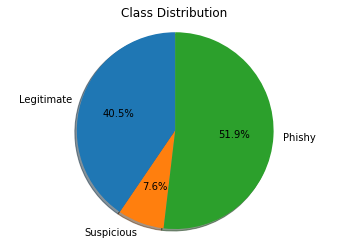

In [715]:
# Class distribution

legit = len(WP[WP['Result'] == 1])
susp = len(WP[WP['Result'] == 0])
phishy = len(WP[WP['Result'] == -1])

labels = 'Legitimate', 'Suspicious', 'Phishy'
sizes = [legit, susp, phishy]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Class Distribution')
plt.show()

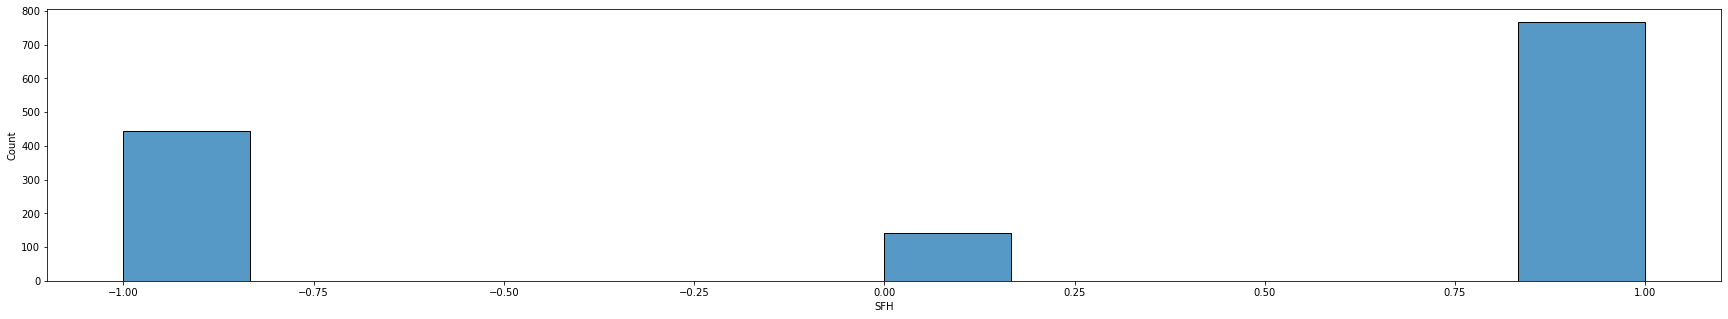

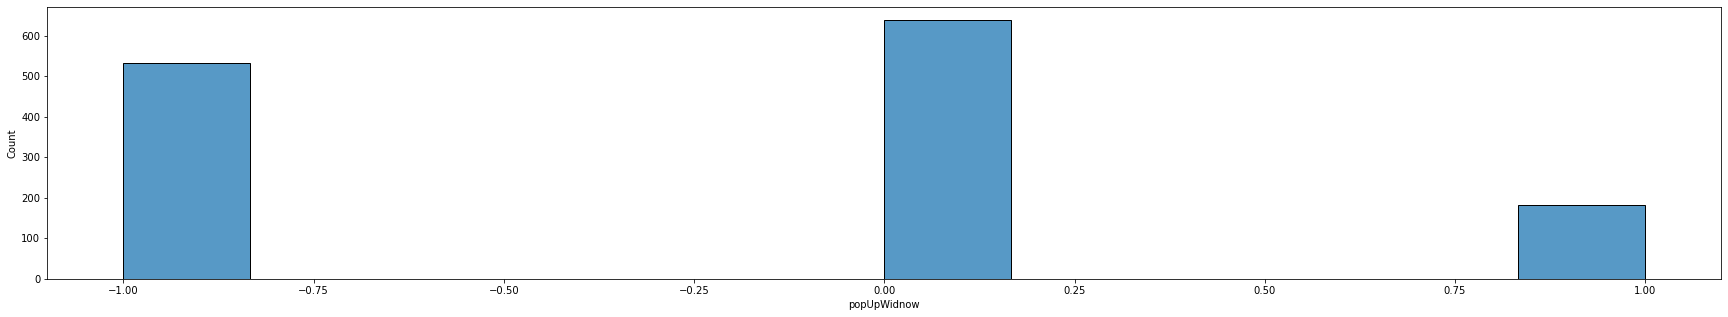

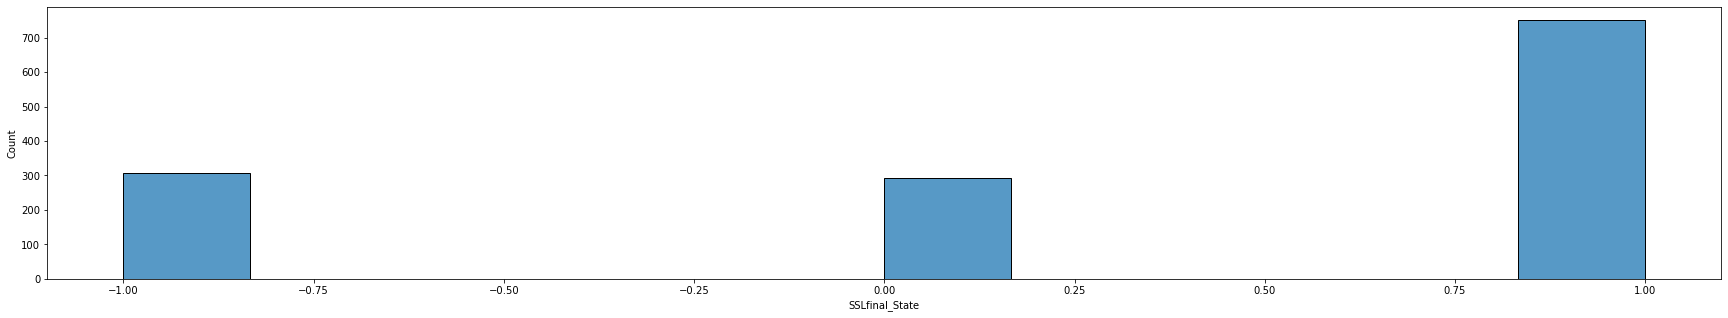

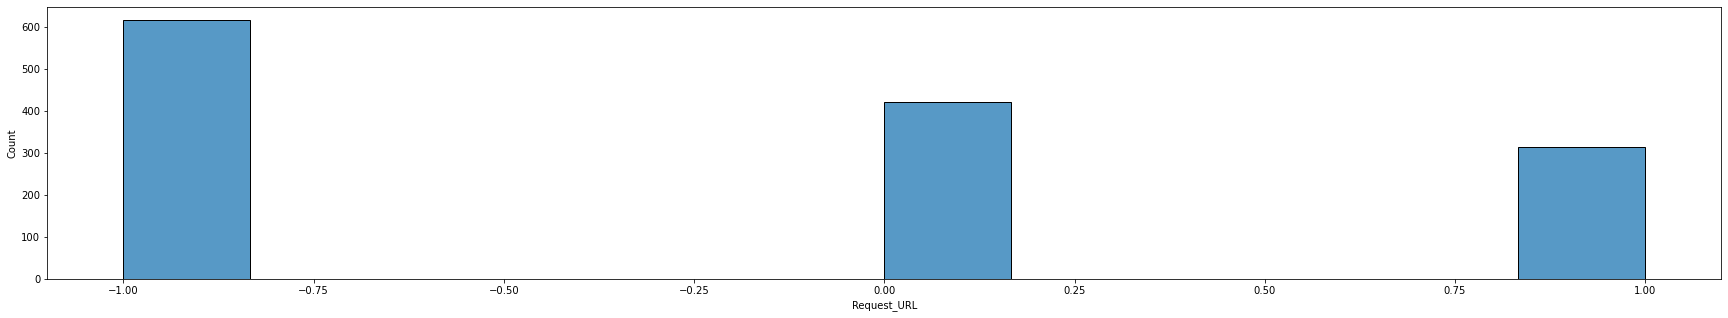

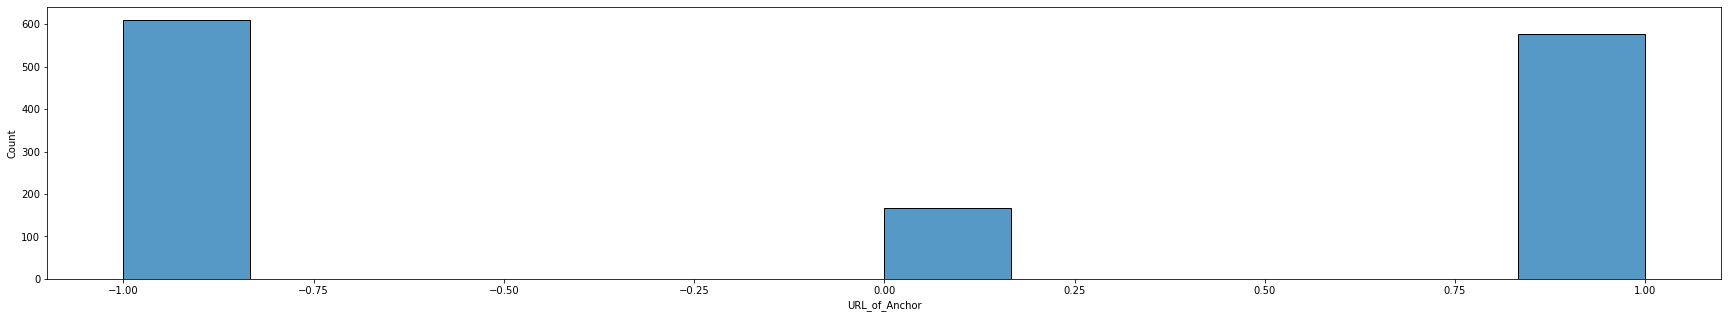

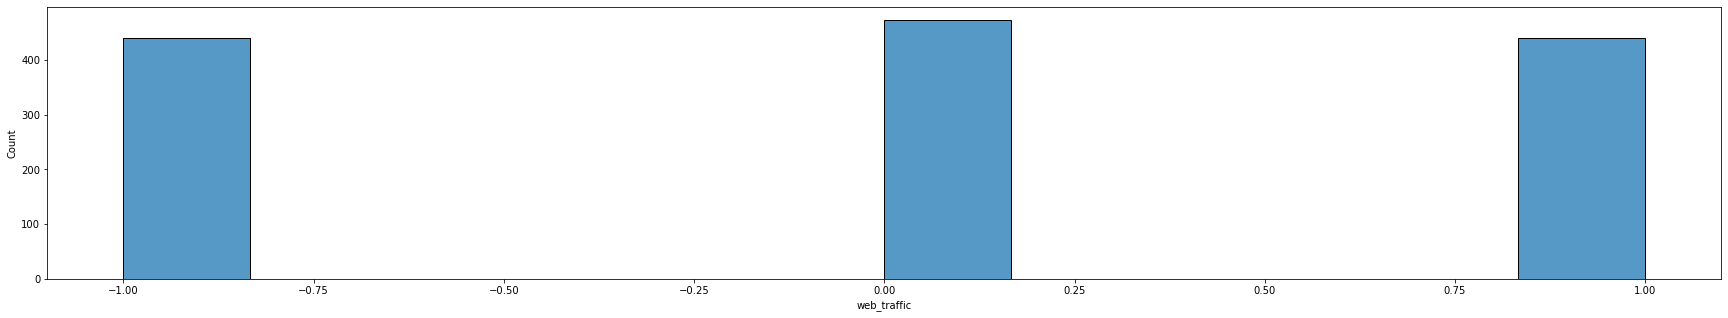

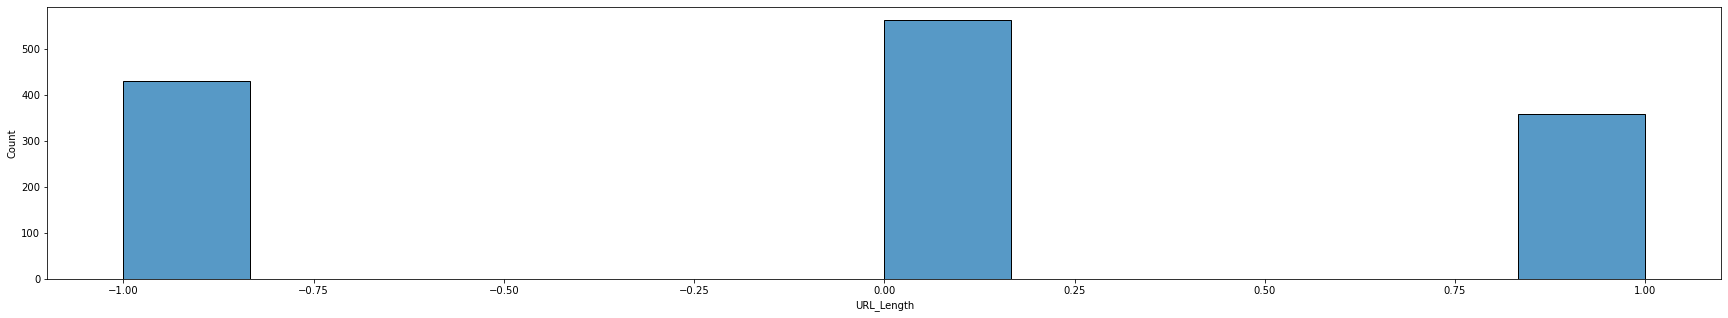

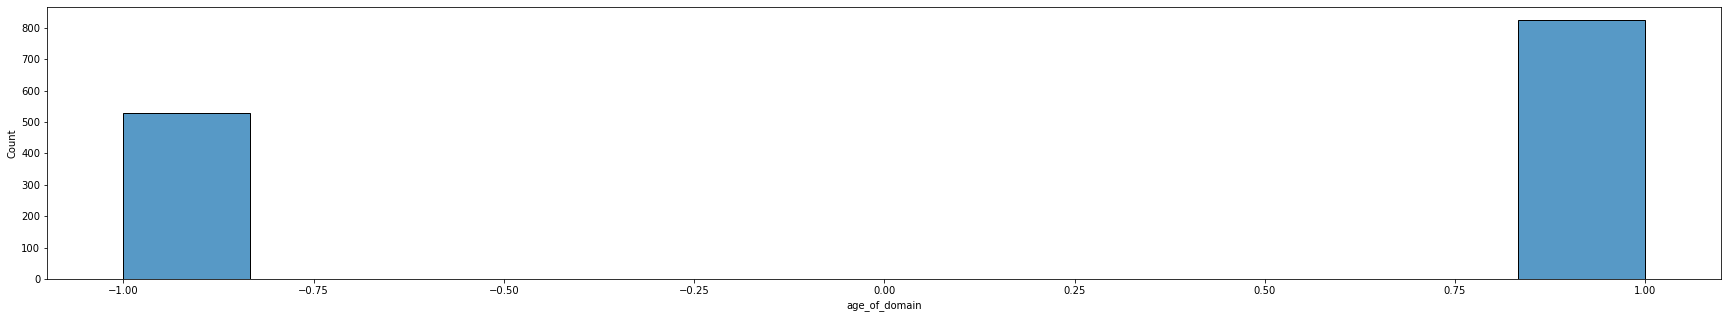

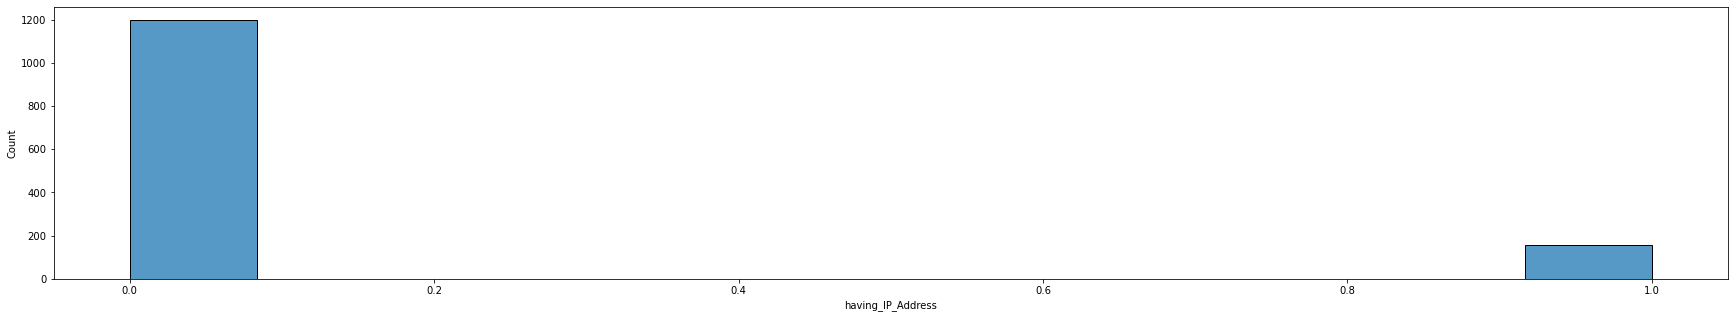

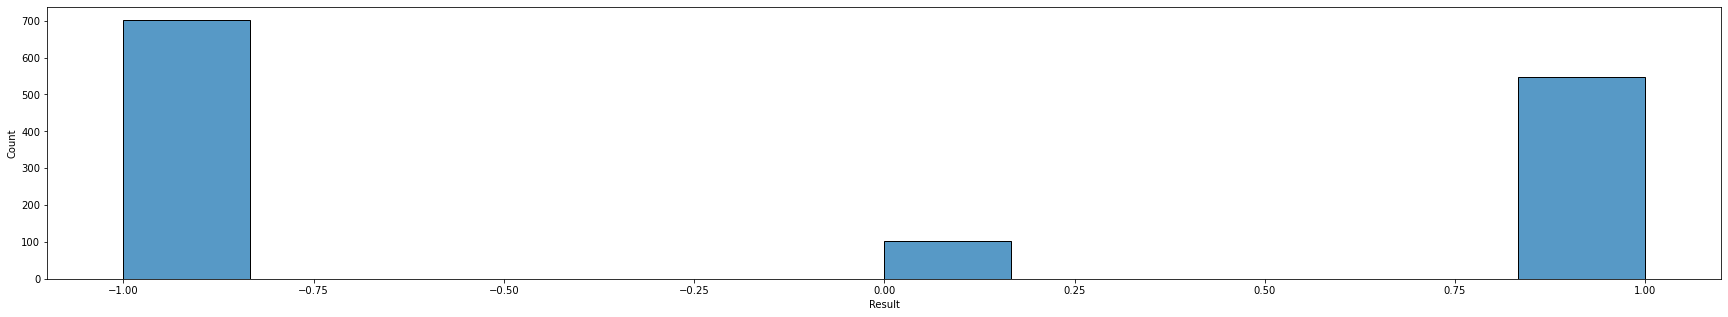

In [716]:
# plt.figure to show that how much features have (1,0,-1)
for columns in WP.columns:
    plt.figure(figsize=(30,5))
    sns.histplot(WP[columns])
    plt.show()

In [717]:
# the highst (0) is having_IP_Address
# the highst (1) is Result
# the highst (-1) is Result

<AxesSubplot:>

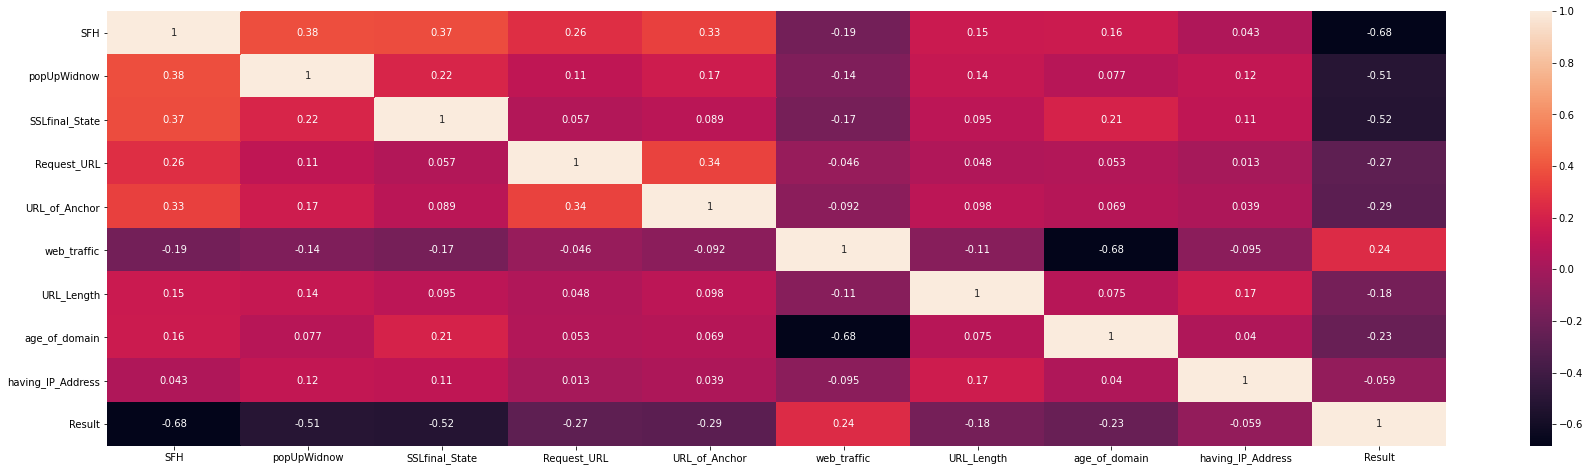

In [718]:
# plt.figure to show that how much features have (1,0,-1)
plt.figure(figsize=(30,8))
sns.heatmap(WP.corr(),annot=True)

# Model

In [719]:
X=WP.values

In [720]:
from sklearn.preprocessing import Normalizer
nor=Normalizer()
X=nor.fit_transform(X)

# K_means

In [721]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
    model=KMeans(n_clusters=i,init='k-means++')
    model.fit(X)
    wcss.append(model.inertia_)

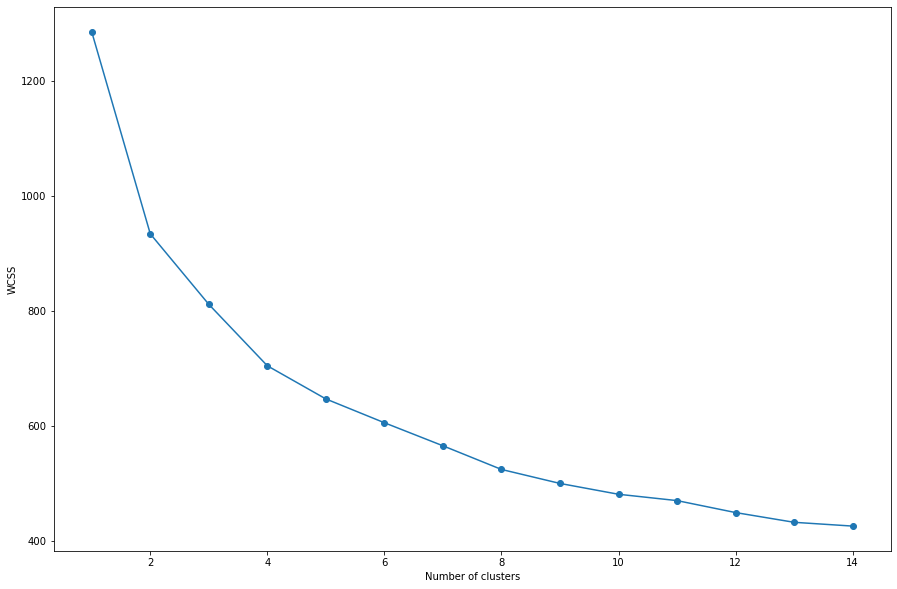

In [722]:
#plo elbow method

plt.figure(figsize=(15,10))
plt.plot(range(1,15),wcss,marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [723]:
model=KMeans(n_clusters=7,init='k-means++')
model.fit(X)

KMeans(n_clusters=7)

In [724]:
y_pred=model.predict(X)

In [725]:
cluster_data=pd.DataFrame(X,columns=WP.columns)
cluster_data['cluster']=y_pred
cluster_data.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result,cluster
0,0.353553,-0.353553,0.353553,-0.353553,-0.353553,0.353553,0.353553,0.353553,0.000000,0.000000,1
1,-0.333333,-0.333333,-0.333333,-0.333333,-0.333333,0.000000,0.333333,0.333333,0.333333,0.333333,5
2,0.408248,-0.408248,0.000000,0.000000,-0.408248,0.000000,-0.408248,0.408248,0.000000,0.408248,5
3,0.408248,0.000000,0.408248,-0.408248,-0.408248,0.000000,0.408248,0.408248,0.000000,0.000000,1
4,-0.377964,-0.377964,0.377964,-0.377964,0.000000,0.000000,-0.377964,0.377964,0.000000,0.377964,5


In [726]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(cluster_data,X,test_size=0.20)

In [727]:
from sklearn.metrics import accuracy_score

In [728]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(train_X)
    wcss.append(kmeans.inertia_)
    
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(test_X)

In [729]:

score_kmean = round(accuracy_score(y_kmeans,test_y)*100,2)

print("The accuracy score achieved using Kmeans is: "+str(score_kmean)+" %")

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets